In [30]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns

In [35]:
data_lacentrale=pd.read_csv('lacentrale_clean_finale.csv', sep=',', encoding='utf8')

In [36]:
print('Les colonnes de data sont',data_lacentrale.columns)

Les colonnes de data sont Index(['nom', 'ref', 'marque', 'modele', 'categorie', 'co2', 'nb_km',
       'carburant', 'boite_vitesse', 'couleur', 'nb_portes', 'nb_places',
       'mise_circulation', 'conso_mixte', 'p_fiscale', 'p_din', 'critair',
       'prix'],
      dtype='object')


In [37]:
data_lacentrale=pd.read_csv('lacentrale_clean_finale.csv')
data_lacentrale.head(10)

,nom,ref,marque,modele,categorie,co2,nb_km,carburant,boite_vitesse,couleur,nb_portes,nb_places,mise_circulation,conso_mixte,p_fiscale,p_din,critair,prix
0,Renault scenic 3,Réf. pro : 120245 | réf. annonce : e106531159,Renault,Scenic 3,Monospace,C,164697.0,Diesel,Manuelle,Gris,5.0,5.0,2010,4.9,6.0,106.0,3.0,6130
1,Renault clio 4,Réf. pro : 50 | réf. annonce : w101726585,Renault,Clio 4,Citadine,B,21830.0,Diesel,Manuelle,Gris foncé metal,5.0,5.0,2019,4,5.0,90.0,2.0,15220
2,Renault clio 4,Réf. pro : 59 | réf. annonce : w101726537,Renault,Clio 4,Citadine,A,62966.0,Diesel,Manuelle,Blanc verni,5.0,5.0,2017,3,4.0,90.0,2.0,12300
3,Renault kadjar,Réf. pro : 65 | réf. annonce : w101728160,Renault,Kadjar,Suv 4x4,B,12.0,Diesel,Auto,Bleu metal,5.0,5.0,2020,4.3,6.0,115.0,2.0,26700
4,Renault megane 3,Réf. pro : 105 | réf. annonce : w101746629,Renault,Megane 3,Berline,B,95646.0,Diesel,Manuelle,Blanc verni,5.0,5.0,2015,4,5.0,95.0,2.0,9840
5,Renault megane 3,Réf. pro : 69 | réf. annonce : w101728356,Renault,Megane 3,Berline,B,93429.0,Diesel,Auto,Gris foncé metal,5.0,5.0,2015,4,6.0,110.0,2.0,12480
6,Renault kadjar,Réf. pro : 49 | réf. annonce : w101726450,Renault,Kadjar,Suv 4x4,A,72392.0,Diesel,Auto,Noir metal,5.0,5.0,2017,3,5.0,110.0,2.0,16890
7,Renault megane 4,Réf. pro : 47 | réf. annonce : w101726188,Renault,Megane 4,Berline,A,90000.0,Diesel,Auto,Rouge metal,5.0,5.0,2019,3,5.0,110.0,2.0,19180
8,Renault captur,Réf. pro : 117813 | réf. annonce : e106272744,Renault,Captur,Suv 4x4,A,30397.0,Diesel,Manuelle,Noir,5.0,5.0,2019,3.7,5.0,110.0,2.0,15800
9,Renault espace 5,Réf. annonce : w101734338,Renault,Espace 5,Monospace,B,23180.0,Diesel,Auto,Gris metal,5.0,7.0,2016,4,8.0,161.0,2.0,24700


In [38]:
print(data_lacentrale.shape[0],'lignes',data_lacentrale.shape[1],'colonnes')

1463 lignes 18 colonnes


In [39]:
data_lacentrale.isnull().sum()

nom                 0
ref                 0
marque              0
modele              0
categorie           0
co2                 0
nb_km               0
carburant           0
boite_vitesse       0
couleur             0
nb_portes           0
nb_places           0
mise_circulation    0
conso_mixte         0
p_fiscale           0
p_din               1
critair             0
prix                0
dtype: int64

In [40]:
data_lacentrale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 18 columns):
nom                 1463 non-null object
ref                 1463 non-null object
marque              1463 non-null object
modele              1463 non-null object
categorie           1463 non-null object
co2                 1463 non-null object
nb_km               1463 non-null float64
carburant           1463 non-null object
boite_vitesse       1463 non-null object
couleur             1463 non-null object
nb_portes           1463 non-null float64
nb_places           1463 non-null float64
mise_circulation    1463 non-null int64
conso_mixte         1463 non-null object
p_fiscale           1463 non-null float64
p_din               1462 non-null float64
critair             1463 non-null float64
prix                1463 non-null int64
dtypes: float64(6), int64(2), object(10)
memory usage: 205.9+ KB


In [41]:
data_lacentrale.describe(include='all')

,nom,ref,marque,modele,categorie,co2,nb_km,carburant,boite_vitesse,couleur,nb_portes,nb_places,mise_circulation,conso_mixte,p_fiscale,p_din,critair,prix
count,1463,1463,1463,1463,1463,1463,1463.000000,1463,1463,1463,1463.000000,1463.000000,1463.000000,1463,1463.000000,1462.000000,1463.000000,1463.000000
unique,77,1382,3,68,4,7,NaN,2,2,239,NaN,NaN,NaN,42,NaN,NaN,NaN,NaN
top,Peugeot 208,Réf. pro : re36c1_ds1192082 | réf. annonce : e...,Peugeot,208,Suv 4x4,B,NaN,Essence,Manuelle,Gris,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
freq,119,2,505,125,541,846,NaN,762,1020,275,NaN,NaN,NaN,181,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,38274.838688,NaN,NaN,NaN,4.943267,5.059467,2018.511278,NaN,5.764867,107.852257,1.463431,19572.631579
std,NaN,NaN,NaN,NaN,NaN,NaN,42339.563893,NaN,NaN,NaN,0.298527,0.549733,2.694876,NaN,1.612857,36.016025,0.522931,7605.210961
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,3.000000,2.000000,1959.000000,NaN,2.000000,0.000000,1.000000,1650.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,10373.000000,NaN,NaN,NaN,5.000000,5.000000,2018.000000,NaN,5.000000,90.000000,1.000000,13780.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,23198.000000,NaN,NaN,NaN,5.000000,5.000000,2019.000000,NaN,6.000000,110.000000,1.000000,17960.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,53740.000000,NaN,NaN,NaN,5.000000,5.000000,2020.000000,NaN,6.000000,130.000000,2.000000,23935.000000


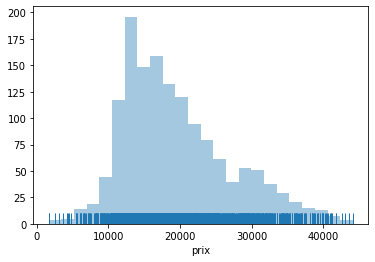

In [42]:
sns.distplot(data_lacentrale['prix'], kde=False, rug=True)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

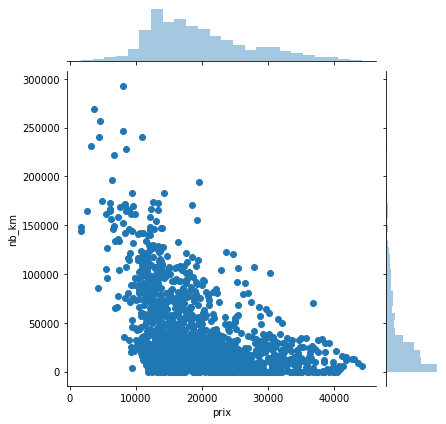

In [43]:
sns.jointplot('prix','nb_km',data_lacentrale)
plt

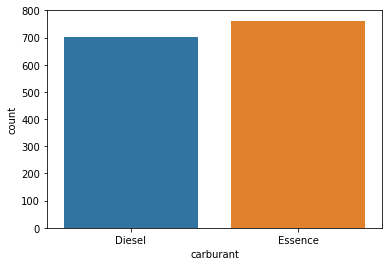

In [44]:
#plt.pie(['Diesel','Essence'],autopct='%1.1f%%')
sns.countplot('carburant',data=data_lacentrale)

(8, 8)


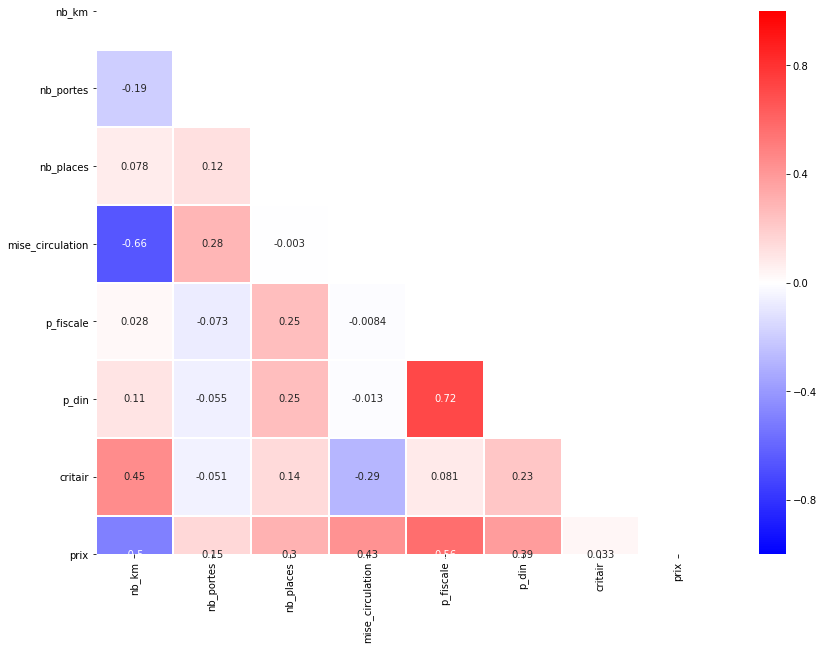

In [45]:
def plot_matrix(df, seuil):

    corr_mask = abs(df.corr()['prix']) > seuil
    high_corr = df.corr().loc[corr_mask,corr_mask]

    plt.figure(figsize=(15,10))
    sns.heatmap(high_corr, 
                annot=True, 
                cmap="bwr",
                linecolor='white', 
                linewidths='1', 
                square=True,
                center=0, 
                vmin=-1,
                vmax=1,
                mask = np.triu(np.ones_like(df.corr(), dtype=np.bool)),
                fmt='.2g')
    plt.xticks(rotation=90)
    print(high_corr.shape)  
plot_matrix(data_lacentrale, 0)

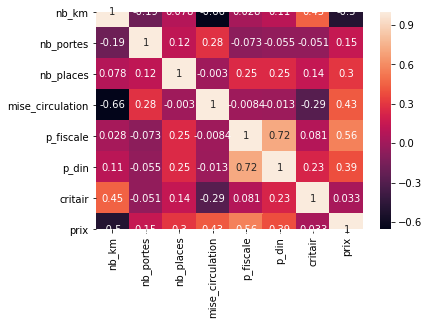

In [46]:
sns.heatmap(data_lacentrale.corr(),annot=True) #corr uniquement quantitatif
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


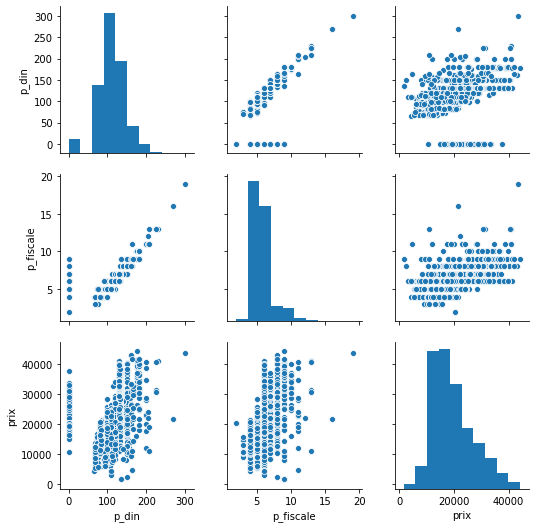

In [47]:
sns.pairplot(data_lacentrale,vars=['p_din','p_fiscale','prix'])

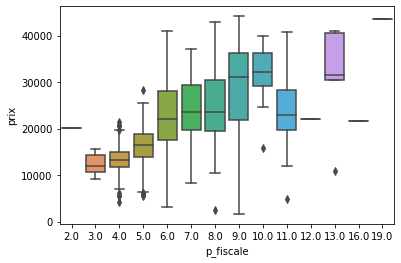

In [48]:
sns.boxplot('p_fiscale','prix',data=data_lacentrale)

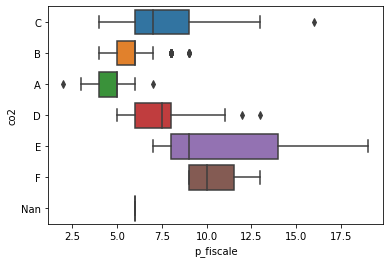

In [49]:
sns.boxplot('p_fiscale','co2',data=data_lacentrale)

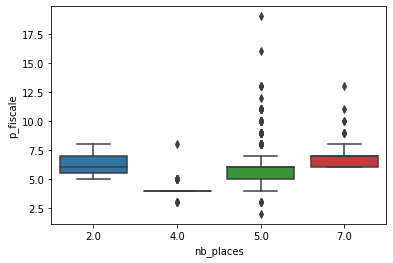

In [50]:
sns.boxplot('nb_places','p_fiscale',data=data_lacentrale)

In [51]:
##sns.boxplot('p_fiscale','p_din',data=data_lacentrale)

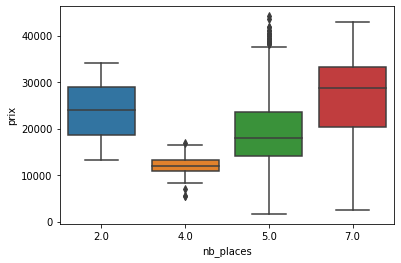

In [52]:
sns.boxplot('nb_places','prix',data=data_lacentrale)

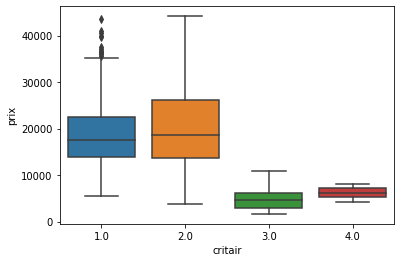

In [53]:
sns.boxplot('critair','prix',data=data_lacentrale)

In [54]:
#sns.boxplot('carburant','prix',data=data_lacentrale)

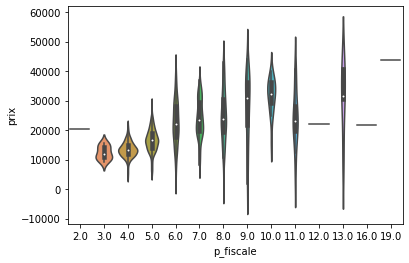

In [55]:
sns.violinplot('p_fiscale','prix',data=data_lacentrale)

In [56]:
plt.figure(figsize=(20,8)
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data_lacentrale.prix) 
plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data_lacentrale.prix) 
plt.show()

SyntaxError: invalid syntax (<ipython-input-56-e96354bebdb2>, line 2)


## conclusion  

In [ ]:
le prix du vehicules moyens est de 17209.67 euro
le prix minimun est de 5530 euros 
l'écart type du prix d'une voitures est de 6089.997508
On peu s'apercevoir que le types de voiture la  plus repondu est la voiture diesel
Nous avons fais une matrice de coréllation est on s'apercoit 
que les variables les plus corollés :sont(p_dim,p_fiscale)
que les variables les plus corollés :sont(prix,p_fiscale)
que les variables les plus corollés :sont(prix,p_dim)
que les variables les plus corollés :sont(p_dim,nb_place)
que les variables les plus corollés :sont (critair,nb_km)
pour la boxplot(prix,nb_place)
plus il y a de places plus la voitures est cher
pour la boxplot(critair,prix)
plus  la voiture à un critair élever moins elle est cher ce  qui montre  que  plus  la  voiture est vielle  moins  elle est cher  
pour la boxplot(carburant,prix)
on peu s'apercevoir que les voitures les plus cher sont c'elle au diesel 
pour la boxplot(prix,p_fiscale)
on  peu s'apercevoir que plus la puissance fiscale est élever plus la voiture est cher  
pour la boxplot(nb_place,prix)
on  peu s'apercevoir que plus le nombre de place est grand plus la voiture est cher
pour la boxplot(pdim,p_fiscale)
on  peu s'apercevoir  que plus la  puissance  est élever  plus  la  dimension de  la voiture est élever 

## netoyages des  données 

In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
#from category_encoders import OrdinalEncoder
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBRegressor
import time
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [131]:
lacentrale_clean4= pd.read_csv('lacentrale_clean4.csv')
lacentrale_clean4.head(50)

,nom,ref,marque,modele,categorie,co2,nb_km,carburant,boite_vitesse,couleur,nb_portes,nb_places,mise_circulation,conso_mixte,p_fiscale,p_din,critair,prix
0,Peugeot 5008,Réf. annonce : w101742031,Peugeot,5008,Monospace,B,51040,Diesel,Manuelle,Blanc nacre,5,7,2017,4.0,8,150,2,20180
1,Peugeot 2008,Réf. pro : 81 | réf. annonce : w101736655,Peugeot,2008,Suv 4x4,A,59822,Diesel,Auto,Gris foncé metal,5,5,2018,3.0,5,99,2,16820
2,Peugeot 2008,Réf. pro : 1652 | réf. annonce : e105694390,Peugeot,2008,Suv 4x4,B,19864,Essence,Manuelle,Gris foncé,5,5,2019,4.8,7,130,1,18340
3,Peugeot 508 (2e generation),Réf. pro : 1814 | réf. annonce : e106119672,Peugeot,508 (2e generation),Berline,B,32103,Diesel,Auto,Gris foncé,5,5,2020,4.5,8,160,2,34200
4,Peugeot 3008 (2e generation),Réf. pro : 63 | réf. annonce : w101728119,Peugeot,3008 (2e generation),Suv 4x4,B,11,Diesel,Auto,Foncé metal,5,5,2021,4.0,6,130,2,34520
5,Peugeot 308 (2e generation),Réf. pro : 79 | réf. annonce : w101733700,Peugeot,308 (2e generation),Berline,A,145197,Diesel,Manuelle,Gris clair metal,5,5,2017,3.0,5,99,2,12180
6,Peugeot 208,Réf. pro : 54 | réf. annonce : w101726995,Peugeot,208,Citadine,A,69888,Diesel,Manuelle,Blanc metal,5,5,2018,3.0,5,99,2,12740
7,Peugeot 208,Réf. pro : 1813 | réf. annonce : e106139833,Peugeot,208,Citadine,A,80989,Diesel,Manuelle,Noir,5,5,2017,3.5,5,100,2,12480
8,Peugeot 208,Réf. pro : 1827 | réf. annonce : e106139834,Peugeot,208,Citadine,A,82336,Diesel,Manuelle,Noir,5,5,2017,3.5,5,100,2,12580
9,Peugeot 208,Réf. pro : 1812 | réf. annonce : e106139832,Peugeot,208,Citadine,B,46209,Essence,Manuelle,Noir,5,5,2017,4.5,4,82,1,12370


In [132]:
lacentrale_clean4.isnull().sum()

nom                 0
ref                 0
marque              0
modele              0
categorie           0
co2                 0
nb_km               0
carburant           0
boite_vitesse       0
couleur             0
nb_portes           0
nb_places           0
mise_circulation    0
conso_mixte         0
p_fiscale           0
p_din               0
critair             0
prix                0
dtype: int64

In [133]:
lacentrale_clean4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
nom                 2100 non-null object
ref                 2100 non-null object
marque              2100 non-null object
modele              2100 non-null object
categorie           2100 non-null object
co2                 2100 non-null object
nb_km               2100 non-null int64
carburant           2100 non-null object
boite_vitesse       2100 non-null object
couleur             2100 non-null object
nb_portes           2100 non-null int64
nb_places           2100 non-null int64
mise_circulation    2100 non-null int64
conso_mixte         2100 non-null float64
p_fiscale           2100 non-null int64
p_din               2100 non-null int64
critair             2100 non-null int64
prix                2100 non-null int64
dtypes: float64(1), int64(8), object(9)
memory usage: 295.4+ KB


In [90]:
lacentrale.mise_circulation=lacentrale.mise_circulation.astype(str)
lacentrale.conso_mixte=lacentrale.conso_mixte.astype('float64')

## études  des  modeles  de  machine learning  

## Etudes  de la problematique 

In [150]:
## Nous allons comparer les  prix  de la  centrale  avec le  prix  du site  beke pour savoir s'il est le  plus cher  

In [151]:
y=pd.DataFrame(lacentrale_clean4,columns=["prix"])
print(y)

       prix
0     20180
1     16820
2     18340
3     34200
4     34520
...     ...
2095  19610
2096  13690
2097  17250
2098  13450
2099   5680

[2100 rows x 1 columns]


In [164]:
X=pd.DataFrame(lacentrale_clean4,columns=["prix","p_fiscale","co2","nb_km","p_din","categorie","carburant"])
X.head(15)

,prix,p_fiscale,co2,nb_km,p_din,categorie,carburant
0,20180,8,B,51040,150,Monospace,Diesel
1,16820,5,A,59822,99,Suv 4x4,Diesel
2,18340,7,B,19864,130,Suv 4x4,Essence
3,34200,8,B,32103,160,Berline,Diesel
4,34520,6,B,11,130,Suv 4x4,Diesel
5,12180,5,A,145197,99,Berline,Diesel
6,12740,5,A,69888,99,Citadine,Diesel
7,12480,5,A,80989,100,Citadine,Diesel
8,12580,5,A,82336,100,Citadine,Diesel
9,12370,4,B,46209,82,Citadine,Essence


In [155]:
data_beke=pd.read_csv('beke_processed.csv', sep=',', encoding='utf8')

In [156]:
print('Les colonnes de data sont',data_beke.columns)

Les colonnes de data sont Index(['nom', 'sous_nom', 'ref', 'marque', 'modele', 'categorie', 'co2',
       'nb_km', 'carburant', 'boite_vitesses', 'couleur', 'nb_portes',
       'nb_places', 'mise_circulation', 'conso_mixte', 'p_fiscale', 'p_din',
       'critair', 'prix'],
      dtype='object')


In [157]:
data_beke=pd.read_csv('beke_processed.csv')
data_beke.head(10)

,nom,sous_nom,ref,marque,modele,categorie,co2,nb_km,carburant,boite_vitesses,couleur,nb_portes,nb_places,mise_circulation,conso_mixte,p_fiscale,p_din,critair,prix
0,CITROËN BERLINGO,1.6 HDI 100 CLUB CAB. APPRO.,18416764611841676461,CITROËN,BERLINGO,DIVERS,113,63432,DIESEL,MANUELLE,BLANC,5,5,2017-03-02,0.0,5,100,2,12728
1,CITROËN BERLINGO,NOUVEAU CABINE APPROFONDIE XL PURETECH 110 S&S...,20934969532093496953,CITROËN,BERLINGO,DIVERS,117,10,ESSENCE,MANUELLE,BLANC,4,5,2020-01-29,0.0,6,110,1,20228
2,CITROËN C1,VTI 72 S S FEEL,12001202195896,CITROËN,C1,CITADINE,85,7095,ESSENCE,MANUELLE,BLEU CALVI,5,4,2019-05-17,3.7,3,72,1,11676
3,CITROËN C1,VTI 72 S S FEEL,12002352195900,CITROËN,C1,CITADINE,93,7647,ESSENCE,MANUELLE,NOIR CALDÉRA,5,4,2019-05-17,3.7,4,72,1,11676
4,CITROËN C1,VTI 72 S S FEEL,12001202195901,CITROËN,C1,CITADINE,85,9674,ESSENCE,MANUELLE,BLEU CALVI,5,4,2019-05-17,3.7,3,72,1,11472
5,CITROËN C1,VTI 72 S S FEEL,12001202195912,CITROËN,C1,CITADINE,85,9506,ESSENCE,MANUELLE,BLEU CALVI,5,4,2019-05-17,3.7,3,72,1,11472
6,CITROËN C1,VTI 72 S S FEEL,12001202195913,CITROËN,C1,CITADINE,85,9474,ESSENCE,MANUELLE,BLEU CALVI,5,4,2019-05-17,3.7,3,72,1,11472
7,CITROËN C3,PURETECH 110 S S EAT6 FEEL,11910023190807,CITROËN,C3,CITADINE,114,19578,ESSENCE,AUTO,ORANGE POWER,5,5,2019-03-21,0.0,6,110,1,17082
8,CITROËN C3,PURETECH 110 S S EAT6 FEEL,11910023190811,CITROËN,C3,CITADINE,114,14399,ESSENCE,AUTO,ORANGE POWER,5,5,2019-03-13,0.0,6,110,1,17592
9,CITROËN C3,PURETECH 82 S S BVM5 FEEL,12000351194105,CITROËN,C3,CITADINE,108,13751,ESSENCE,MANUELLE,GRIS PLATINIUM,5,5,2019-03-08,0.0,4,82,1,14736


In [175]:
data_beke.describe(include='all')

,nom,sous_nom,ref,marque,modele,categorie,co2,nb_km,carburant,boite_vitesses,couleur,nb_portes,nb_places,mise_circulation,conso_mixte,p_fiscale,p_din,critair,prix
count,392,392,392,392,392,392,392.000000,392.000000,392,392,392,392.000000,392.000000,392,392.000000,392.000000,392.000000,392.000000,392.000000
unique,39,105,392,3,39,7,NaN,NaN,2,2,57,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN
top,PEUGEOT 208,1.6 BLUEHDI 100CH BVM5 ACTIVE,12002261199241,PEUGEOT,208,CITADINE,NaN,NaN,ESSENCE,MANUELLE,NOIR PERLA NERA,NaN,NaN,2019-06-24,NaN,NaN,NaN,NaN,NaN
freq,97,66,1,251,97,181,NaN,NaN,215,312,63,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,101.089286,30097.581633,NaN,NaN,NaN,4.959184,4.875000,NaN,3.357143,5.020408,105.168367,1.451531,16676.295918
std,NaN,NaN,NaN,NaN,NaN,NaN,22.444012,25142.025614,NaN,NaN,NaN,0.283145,0.604491,NaN,1.830755,1.586255,25.705239,0.498281,5504.024385
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,5.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,0.000000,3.000000,68.000000,1.000000,7688.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,9342.750000,NaN,NaN,NaN,5.000000,5.000000,NaN,3.200000,4.000000,82.000000,1.000000,13180.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,104.000000,25422.500000,NaN,NaN,NaN,5.000000,5.000000,NaN,3.600000,5.000000,100.000000,1.000000,14685.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,110.000000,46290.000000,NaN,NaN,NaN,5.000000,5.000000,NaN,4.700000,6.000000,120.000000,2.000000,19326.000000


In [184]:
data_lacentrale.describe(include='all')

,nom,ref,marque,modele,categorie,co2,nb_km,carburant,boite_vitesse,couleur,nb_portes,nb_places,mise_circulation,conso_mixte,p_fiscale,p_din,critair,prix
count,2400,2400,2400,2400,2400,2400,2400.000000,2400,2400,2400,2400.000000,2400.000000,2400,2350.000000,2400.000000,2400.000000,2400.000000,2400.000000
unique,25,48,3,25,7,5,NaN,3,2,21,NaN,NaN,182,NaN,NaN,NaN,NaN,NaN
top,CITROEN C3 (3E GENERATION),Réf. pro : 37 | Réf. annonce : W101725663,CITROEN,C3 (3E GENERATION),Citadine,B,NaN,Diesel,mécanique,noir metal,NaN,NaN,17/09/2017,NaN,NaN,NaN,NaN,NaN
freq,300,50,800,300,700,1200,NaN,2050,1700,300,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,63143.233333,NaN,NaN,NaN,4.937500,5.020833,NaN,3.838298,5.687500,113.979167,1.875000,17209.695833
std,NaN,NaN,NaN,NaN,NaN,NaN,48955.541047,NaN,NaN,NaN,0.242112,0.829067,NaN,0.747225,1.261153,28.566917,0.388722,6089.997508
min,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,4.000000,2.000000,NaN,3.000000,4.000000,75.000000,1.000000,5530.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,29754.000000,NaN,NaN,NaN,5.000000,5.000000,NaN,3.000000,5.000000,92.250000,2.000000,12790.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,52360.000000,NaN,NaN,NaN,5.000000,5.000000,NaN,4.000000,5.000000,110.000000,2.000000,15580.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,86702.000000,NaN,NaN,NaN,5.000000,5.000000,NaN,4.300000,6.000000,124.000000,2.000000,19740.000000


In [186]:
print("prix voiture moyenne pour beke =16676.295918")
print("prix voiture max pour beke =41728.0")
print("prix voiture min pour beke =7688")
print("prix voiture écart  type  5504.024")
print("---")
print("prix voiture moyenne pour lacentrale 17209.695833")
print("prix voiture max pour lacentrale =41728.0")
print("prix voiture min pour lacentrale =5530")
print("prix voiture écart type lcentrale=35490.00")

prix voiture moyenne pour beke =16676.295918
prix voiture max pour beke =41728.0
prix voiture min pour beke =7688
prix voiture écart  type  5504.024
---
prix voiture moyenne pour lacentrale 17209.695833
prix voiture max pour lacentrale =41728.0
prix voiture min pour lacentrale =5530
prix voiture écart type lcentrale=35490.00


In [212]:
moyenne_beke=16676.295918
moyenne_lacentrale=17209.695833
max_beke =41728.0
max_lacentrale =35490.0
min_lacentrale=5530
min_beke=7688
ecartmoyen=moyenne_lacentrale-moyenne_beke
print("ecartmoyen",ecartmoyen)
ecartmax=max_beke-max_lacentrale
print("ecartmax=",ecartmax)
ecartmin=min_beke-min_lacentrale
print("ecartmin=",ecartmin)


ecartmoyen 533.3999150000018
ecartmax= 6238.0
ecartmin= 2158


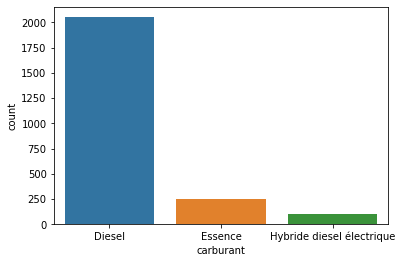

In [171]:
#plt.pie(['Diesel','Essence'],autopct='%1.1f%%

sns.countplot('carburant',data=data_lacentrale)

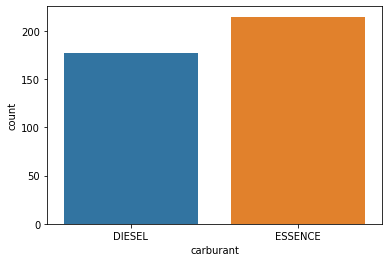

In [176]:
#plt.pie(['Diesel','Essence'],autopct='%1.1f%%')
sns.countplot('carburant',data=data_beke)

In [160]:
ypredit=pd.DataFrame(data_beke,columns=["prix"])
print(ypredit)

      prix
0    12728
1    20228
2    11676
3    11676
4    11472
..     ...
387  27728
388  40538
389  11928
390  11928
391  11728

[392 rows x 1 columns]


In [3]:
# Basic tools :
import numpy as np                      
import pandas as pd  

# Plot
import matplotlib.pyplot as plt         
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,LabelBinarizer 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Predictors :
from sklearn.linear_model import LinearRegression,LogisticRegression, LogisticRegressionCV, RidgeCV, LassoCV, ElasticNet
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
#from xgboost import XGBClassifier, XGBRegressor
# from sklearn import neighbors 
# from sklearn.naive_bayes import GaussianNB , ComplementNB,CategoricalNB              

# Metrics : 
from sklearn.metrics import mean_squared_error, r2_score,roc_curve, roc_auc_score, auc 
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score

# Optimization / Validation :
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

from sklearn import svm, datasets,preprocessing

# cell multiple outputs
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Others :
from itertools import cycle
from scipy import interp
from sklearn.pipeline import Pipeline
import time
from sklearn.decomposition import PCA

In [4]:
lacentrale = pd.read_csv('lacentrale_clean4.csv')
beke = pd.read_csv('beke_processed.csv')

In [5]:
def preprocessing():
    # on définit les colonnes et les transformations pour 
    # les colonnes quantitatives
    col_quanti=['nb_km','nb_portes','nb_places','conso_mixte','p_fiscale','p_din']

    transfo_quanti = Pipeline(steps=[
        ('imputation', SimpleImputer(strategy='median')),
        ('standard', StandardScaler())])

    # on définit les colonnes et les transformations pour
    # les variables qualitatives

    #variable ordinales
    #le mapping = ordinal_cols_mapping
    ordinal_cols_mapping = [
        {
        "col":'co2',    
        "mapping": {
            'A':4, 
            'B':3, 
            'C':2, 
            'D':1,       
        }},
        {
        "col":'critair',    
        "mapping": {
            1:3, 
            2:2, 
            3:1,       
        }} 
    ]
    col_quali_ord = ['co2','critair',]
    transfo_quali_ord = Pipeline(steps=[
        ('ordinalEncoder', OrdinalEncoder(mapping=ordinal_cols_mapping, return_df = True))
    ])
    col_quali_nom= ['marque','modele','categorie','carburant','boite_vitesse','couleur','mise_circulation' ]
    transfo_quali_nom = Pipeline(steps=[
        ('imputation', SimpleImputer(strategy='constant', fill_value='Missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    # on définit l'objet de la classe ColumnTransformer
    # qui va permettre d'appliquer toutes les étapes
    preparation = ColumnTransformer(
        transformers=[
            ('quanti', transfo_quanti , col_quanti),
            ('quali_ord', transfo_quali_ord , col_quali_ord),
            ('quali_nom', transfo_quali_nom , col_quali_nom)
        ], remainder='drop')
    return preparation 
preparation = preprocessing()

NameError: name 'OrdinalEncoder' is not defined

In [13]:
         'RF': { 'model':RandomForestRegressor(),
              'param':{
                  'clf__n_estimators': [100,200,300,500,1000],
                'clf__max_depth': [1,5,10,15,50,70],
#                   'clf__min_samples_split': [1,5,10,15]
#                   'cl_max_leaf_nodes': [ 100, 200, 300, 400, 500, 600, 650, 700, 800]
                    },
            },
        'Lasso': { 'model': LassoCV(),
                'param': {'clf__alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
             },
        'Ridge': { 'model': RidgeCV(),
                'param': {'clf__alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
             },
    
        'Elastic': { 'model': ElasticNet(),
                'param': {'clf__alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'clf__l1_ratio' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
                         }
             },
        'LR': { 'model': LogisticRegression(),
                'param': {'clf__penalty' : ['l1', 'l2'], 'clf__C' : np.logspace(-4, 4, 20), 'clf__solver' : ['liblinear']},
             },
        'SVR':{ 'model': SVR(),
                'param': {'clf__C': [0.1,1, 10, 100], 'clf__gamma': [1,0.1,0.01,0.001],'clf__kernel': ['rbf', 'poly', 'sigmoid'],
                         },
             },
      
        'XGB':{ "model":XGBRegressor(),
              "param":{"clf__learning_rate": [0.05,1,5],'clf__n_estimators': [100,50],
#                        "clf__max_depth": [5,10,15]
                  },
            },
    
        'GradientBoost':{ "model":GradientBoostingRegressor(),
              "param":{"clf__model__n_estimators": [ 500, 600,700,800,1000],
#                         "clf__max_depth": [2, 3, 4]
                  },
            },
    
        'decisionTree':{ "model":GradientBoostingRegressor(),
              "param":{"clf__criterion": ['mse', 'mae'],
                'clf__min_samples_leaf': [5, 10, 15, 20, 25],
                'clf__max_depth': [6, 9, 12, 15, 20],
                  },
            },

SyntaxError: invalid syntax (<ipython-input-13-b0bb9d9085c6>, line 8)

In [9]:
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [10]:
def modele_entier(cl, df_train, df_test):
    model = Pipeline(steps=[('preparation', preparation),
                            ('to_dense', DenseTransformer()),
                         ('clf', cl['model'] )
                    ])
    
    # PROCESSING & ENTRAINEMENT

    param_grid = cl['param']

    # on sépare la cible du reste des données (dataset d'entraînement)
    X = df_train.drop(['prix','nom','ref'], axis=1)
    y = df_train['prix']

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
    # Debut du decompte du temps
    start_time = time.time()

    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10, verbose=False)
    
    grid.fit(X_train,y_train)
    
    print(grid.best_estimator_)
    
    # Score de l'entraînement
    accuracy = grid.score(X_test, y_test)    
    print(("best score  : %.5f" % accuracy))
    
    # Temps d'entraînement
    times = (time.time() - start_time)
    print("Temps d'entraînement' : %s secondes ---" % times)    
    
    # PREDICTIONS
    
    # on sépare la cible du reste des données (dataset de test)
    X_reel = df_test.drop(['prix','nom','ref'], axis=1)
    y_reel = df_test['prix']  
    
    y_pred = grid.predict(X_reel)   
                                    
    return y_pred

y_pred = modele_entier(regression['SVR'], lacentrale, beke)

NameError: name 'regression' is not defined

In [11]:
dic = {
    "prix_prediction": y_pred,
    "prix_beke":beke['prix'].values,
    "p_beke-p_pred":beke['prix'].values - y_pred,
}
comparaison = pd.DataFrame(data=dic)
comparaison

NameError: name 'y_pred' is not defined

In [14]:
comparaison.describe()

NameError: name 'comparaison' is not defined

In [16]:
means=(10+15+11+8+11+8+10+13+16+11+13+13)/14
print(means)

9.928571428571429


In [19]:
means2=29+26+19+18+18+13+14+18+22+27+24+20+21+21
print(means2/14)

20.714285714285715
